In [1]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

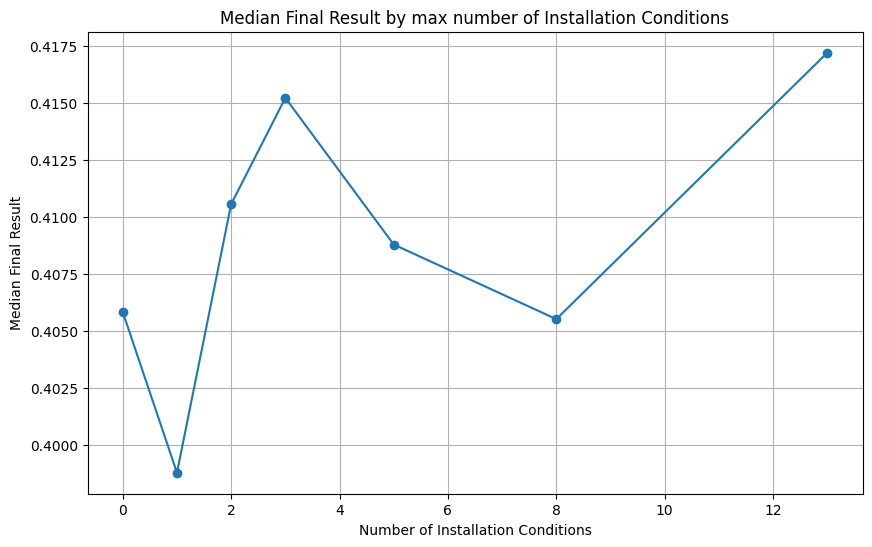

In [ ]:
findspark.init()
df = pd.read_parquet('../../../generate data/datasets/general/')
df = df[df["partCodeId"].str.len() > 7]
df["numberOfInstallationConditions"] = df["numberOfInstallationConditions"].astype(int)
df["formula_result"] = (df["dfQuantity"] - df["actualQuantity"]).abs() / df["actualQuantity"]
# Group by the correct columns
df_result = df.groupby([
    "numberOfInstallationConditions",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Remove values that are below 0
df_result = df_result[df_result["final_result"] >= 0]


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_result["numberOfInstallationConditions"], df_result["final_result"], marker='o')
plt.xlabel("Number of Installation Conditions")
plt.ylabel("Median Final Result")
plt.title("Median Final Result by max number of Installation Conditions")
plt.grid(True)
plt.show()